# Introduction

When tasked with determining the "best" neighborhood in Pittsburgh our first challenge was figuring out what it meant to be the best. After some long deliberation we realized that we were all looking 
at the same idea from different perspectives. We looked at how dangerous it could be to live in a neighborhood by analyzing the quantity of police incidents(reports) that occured from 2016-2023. We then looked at what can counter the mentioned data by analizing police efficiency by looking at how many arrests take place in each neighborhood. We also looked at how many trees there are in neighborhoods to determine how environmentally friendly the neighborhoods are. Now these perspectives and subsequent data sets focus on the most important part of any neighborhood, the residents. We had the same idea, the best neighborhood is one that best takes care of its residents. After realizing we had the same idea in different ways, we were able to quickly combine our data to determine what the best neighborhood was. By combining the arrest data with incident data we were able to create a metric ranging between 0 to 1 that determines how safe a neighborhood is. Then by taking the 25 neighborhods with the highest metric we then looked at which of those neighborhoods had the most trees, which allowed us to narrow down our search for the best neighborhood down to the best 10. Then we looked at which one was in the number one spot and we had our answer.     

# Blotter Data 

# Metric
I will be using this data set(https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e) to discuss how police blotter data shows how dangerous a neighborhood can be by assuming that more reports correlates to more dangers present in the environment for the residents of that neighborhood. I will be calculating this by adding up all the incidents per neighborhood over the period of 2016-2023. This data set in particular does not include sex crimes or incidents that include other police forces that are not City of Pittsburgh Police. 

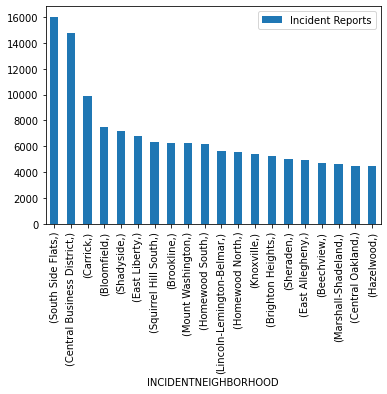

In [41]:
#Blotter Data
import pandas as pd
import matplotlib.pyplot as grapher
%matplotlib inline

crime_reports = pd.read_csv("Blotter_Data.csv")
crime_reports = crime_reports.filter(items=['INCIDENTNEIGHBORHOOD'])
crime = crime_reports.value_counts()
crime = pd.DataFrame(crime, columns=['Incident Reports'])
crime.head(20).plot.bar()

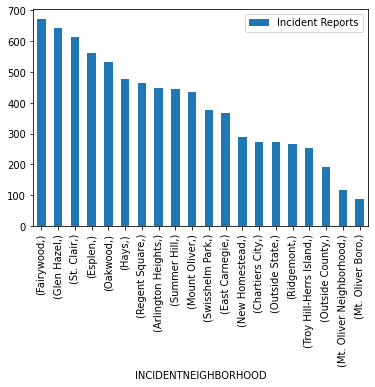

In [42]:
crime.tail(20).plot.bar()

# Best Neighborhood 
My guess before looking at the data was that the best neighborhood was going to be somewhere outside of downtown, and after taking a look at the data I was right. The neighborhood that has the least amount of danger, measured as the least amount of crimes reported, is Mt. Oliver Boro. With that information I was sure that I have found the best neighborhood becuase most people would want to stay far away from danger. 

# Arrests

## Introduction
For this project, I looked for the best neighborhood in Pittsburgh through analyzing police arrest data. I chose this data set because arrests and the safety of a neighborhood go hand in hand, as the city with the most arrests has the best police officers.

## The Metric
My metric was the arrests made throughout the city of Pittsburgh, as I wanted to find the safest neighborhood. The number of arrests goes hand in hand with the effectiveness of law enforcement, as more arrests mean that officers are properly combating criminal activity. I used data from https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f to draw my conclusions, as it has various information on each arrest made in Pittsburgh, including the neighborhood where the arrest took place.

## The Best Neighborhood
I believe Shadyside is the best neighborhood because it seems to be the safest neighborhood I've visited so far. However, I was incorrect, as Shadyside ranked 22nd in leading number of arrests by police officers. Central Business District had the highest number of arrests and thus the best law enforcement and safest neighborhood to live in Pittsburgh.

To find the best neighborhood based on arrest data, I first had to read the information in the dataset.

In [43]:
#Arrest Data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#store the dataset into a variable
arrest_data = pd.read_csv("arrests.csv")
#view the data set
arrest_data

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65134,86395,2062454,23141162,24.0,F,B,2023-09-12T08:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",903 Criminal Conspiracy. / 2701 Simple Assault...,"Parkfield ST & Dartmore ST Pittsburgh, PA 15210",Carrick,3,2901.0,4.0,3.0,-79.996301,40.394453
65135,86396,2062455,23140340,35.0,M,B,2023-09-04T16:30:00,"Liberty BRDG & P J Mc Ardle RDWY Pittsburgh, P...",2701 Simple Assault.,"Liberty BRDG & P J Mc Ardle RDWY Pittsburgh, P...",South Side Slopes,3,1706.0,NaN,NaN,NaN,NaN
65136,86397,2062456,23141901,31.0,M,B,2023-09-07T02:19:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",2701 Simple Assault.,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",Northview Heights,1,2609.0,NaN,NaN,NaN,NaN
65137,86398,2062457,23141904,38.0,M,W,2023-09-07T02:33:00,"S Main ST & W Carson ST Pittsburgh, PA 15219",1784 Proof of Financial Responsibility Followi...,"S Main ST & W Carson ST Pittsburgh, PA 15219",South Shore,3,1921.0,NaN,NaN,NaN,NaN


In [44]:
#only include the column with details on the neighborhood where the incident occurred
arrest_data = arrest_data.filter(items=["INCIDENTNEIGHBORHOOD"])

#display the resulting DataFrame
arrest_data

,INCIDENTNEIGHBORHOOD
0,Bloomfield
1,Outside City
2,Westwood
3,East Allegheny
4,Crafton Heights
...,...
65134,Carrick
65135,South Side Slopes
65136,Northview Heights
65137,South Shore


In [45]:
#gets the data series which has the number of times each neighborhood showed up in this data set
#also sorts it in descending order to see which neighborhood has the most number of arrests at the top
arrests_by_neighborhood = arrest_data.value_counts()
#name the column with the number of arrests "arrests"
arrests_by_neighborhood = pd.DataFrame(arrests_by_neighborhood, columns=["arrests"])
#convert to dictionary for future calculations
arrests_dict = arrests_by_neighborhood.to_dict()

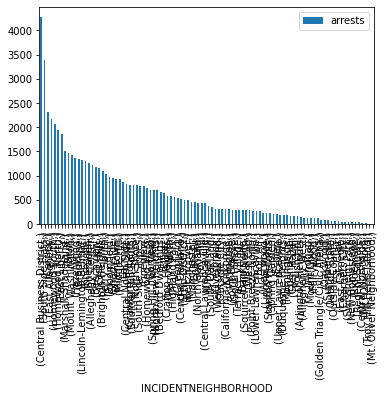

In [46]:
#use a bar plot to visualize arrests by each neighborhood
arrests_by_neighborhood.plot.bar()

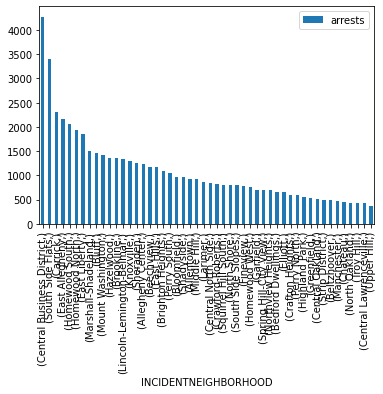

In [47]:
#only include the top 50 values
arrests_by_neighborhood.head(50).plot.bar()

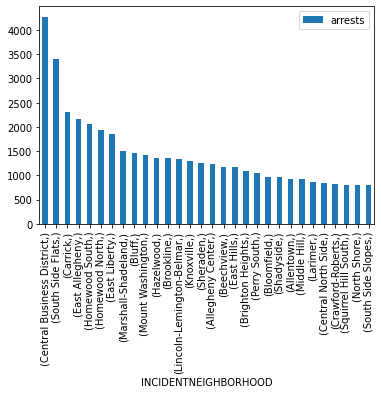

In [48]:
#only include the top 30 values
arrests_by_neighborhood.head(30).plot.bar()

# Trees

# The Metric
I used the data set that shows all the trees in Pittsburgh and their location. 
# The Best Neighborhood
I think, from the data, that Squirrel Hill South is the best neighborhood. It has the most most healthy trees compared to the other neighborhoods showing that not only is it the best place to live because of the natural atmostphere with the abundance of trees and nature, since the trees are also healthy then it shows that the neighborhood is also very healthy since the enviroment can sustain so many trees.

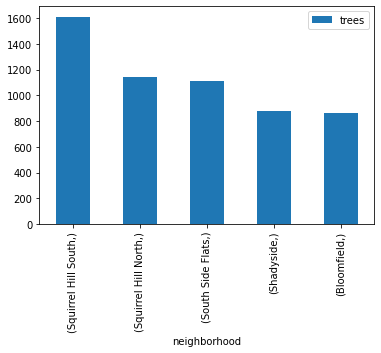

In [49]:
#Tree Data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tree_data = pd.read_csv("trees.csv")
tree_data = tree_data.query('condition == "Good" or condition== "Fair"')
tree_data = tree_data.filter(items=["neighborhood"])
neighborhood_trees = tree_data.value_counts(ascending=False)
neighborhood_trees = pd.DataFrame(neighborhood_trees, columns=["trees"])
neighborhood_trees_top = neighborhood_trees.head(5)
neighborhood_trees_top.plot.bar()

# Coming Together

In [65]:
#Data is taken from arrests csv and Blotter data csv
import pandas as pd
import math
crime_reports = pd.read_csv("Blotter_Data.csv")
arrests = pd.read_csv("arrests.csv")
dictionary_b = {}
dictionary_a = {}
dictionary_c = {}
for index, row in crime_reports.iterrows():
    if row['INCIDENTNEIGHBORHOOD'] in dictionary_b:
        dictionary_b[row['INCIDENTNEIGHBORHOOD']] = dictionary_b[row['INCIDENTNEIGHBORHOOD']] + 1
    else:
        dictionary_b[row['INCIDENTNEIGHBORHOOD']] = 1
for index, row in arrests.iterrows():
    if row['INCIDENTNEIGHBORHOOD'] in dictionary_a:
        dictionary_a[row['INCIDENTNEIGHBORHOOD']] = dictionary_a[row['INCIDENTNEIGHBORHOOD']] + 1
    else:
        dictionary_a[row['INCIDENTNEIGHBORHOOD']] = 1  
    
#calculates the ratios for the metric of arrests/blotter reports    
for i in dictionary_a:
    dictionary_c[i] = float(dictionary_a[i]/dictionary_b[i])

#creating a list that holds the top 25 neighborhoods
dc = sorted(dictionary_c.items(), key=lambda x:x[1], reverse=True)
display_combined = []
tp_25 = []
count = 0
for i in dc:
    if count<25:
        if isinstance(i[0], str):
            display_combined.append(i)
            tp_25.append(i[0])
            count = count + 1
for i in display_combined:
    print(i)

    

('Fineview', 0.5110103626943006)
('East Allegheny', 0.43691872219975736)
('Allegheny Center', 0.4058784676354029)
('Bluff', 0.38568797684819783)
('Esplen', 0.35168738898756663)
('Homewood North', 0.3499638467100506)
('Arlington Heights', 0.3422818791946309)
('Spring Hill-City View', 0.34177215189873417)
('Homewood South', 0.3331174089068826)
('Marshall-Shadeland', 0.3245993936769164)
('Central North Side', 0.3153904473085671)
('Northview Heights', 0.31205357142857143)
('Homewood West', 0.31195697145221346)
('Bedford Dwellings', 0.30830595964335994)
('Hazelwood', 0.304270462633452)
('Elliott', 0.30335507921714816)
('Perry South', 0.2993960310612597)
('Outside County', 0.2916666666666667)
('Beltzhoover', 0.2895204262877442)
('Central Business District', 0.28869529983792547)
('South Shore', 0.2880859375)
('Mount Oliver', 0.2827586206896552)
('Spring Garden', 0.2754182754182754)
('West End', 0.2752203721841332)
('East Liberty', 0.27315495442516907)


In [70]:
##this is the merge code
dictionary_trees = {'neighborhood':[],
        'trees':[]
       }
df = pd.DataFrame(dictionary_trees)
##n is the list of top n cities from the first filter of crime
for x in tp_25:
    if x in neighborhood_trees.iloc[:, 0]:
        result = neighborhood_trees.loc[x]
        df.loc[len(df.index)] = [x, result.iloc[0, 0]]
df = df.sort_values(by=['trees'], ascending=False)
df.head(10)

,neighborhood,trees
21,East Liberty,779
17,Central Business District,751
13,Hazelwood,321
9,Marshall-Shadeland,313
1,East Allegheny,293
5,Homewood North,198
8,Homewood South,196
15,Perry South,180
3,Bluff,159
12,Bedford Dwellings,139


# Conclusion 
I am kind of surprised since Squirrel Hill was first when just looking at the tree data but didn't even make it in the top ten for the combined metrics. Same with East Liberty, when looking at the tree data it wasn't even top 10 but with the combined metric it is the best.

Looking at these results, it appears that Central Business District is the best neighborhood in Pittsburgh, unlike my prediction, Shadyside, earlier. However, I was surprised that East Liberty was the best neighborhood overall, as it only ranked 7th in my analysis. Additionally, I have never been to East Liberty, so I cannot confirm or deny the validity of these findings based off of my own personal experiences. I believe that safety of a neighborhood is very important in determining if it is the best, and arrest rates are an accurate way of quantifying this. However, not all people arrested are guilty; some arrests are unwarranted, meaning that this data set could be biased.

I am not surprised that the area is outside of downtown, however I was not expecting East Liberty. Looking at the data from the blotter section East Liberty is in the top 20 neighborhoods that have the most police reports. Though I did not expect a neighborhood from the tail end with the least reports, I would have been more inclined to believe a neighborhood that was between the head and tail ends of the graphs.  

Overall we as people are different and therefore value different things as more important than others, it is through that difference that we made our decisions as to what is the mark of the best neighborhood. However after pondering how to decide which neighborhood is the best and why we came to the realization that we were all looking at the same thing through different lenses. How dangerous an area is, how effective are the forces to keep people safe, and how is the environment all come together for what really matters in a neighborhood, the people. That people first approach allowed us to combine our data sets into one vision that yielded the answer to what is the best neighborhood, East Liberty because it cares about the residents the most while upholding all of our different values.    